In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Đọc dữ liệu, truy xuất một số thông tin thống kê trên dữ liệu.

In [19]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

label_dict = {0: 'Setosa', 1: 'Versicolor', 2: 'Verginica'}

Tính toán d-dimensional mean vectors của các class dữ liệu.

In [20]:
np.set_printoptions(precision = 4)

mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X_iris[y_iris==cl], axis=0))
    print('Mean vector of class', cl+1, mean_vectors[cl],'.T')

Mean vector of class 1 [5.006 3.428 1.462 0.246] .T
Mean vector of class 2 [5.936 2.77  4.26  1.326] .T
Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


Tính toán các ma trận within-class scatter matrix.

In [21]:
S_W = np.zeros((4,4))

for cl, mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X_iris[y_iris == cl]:
        row = row.reshape(4, 1)
        mv = mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row -mv).T)
    S_W += class_sc_mat

print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


Tính toán between-class scatter matrix.

In [22]:
#the calculate the overall mean with a simple function
overall_mean = np.mean(X_iris, axis = 0)

#initialize zeros mnatrix
S_B = np.zeros((4,4))

#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X_iris[y_iris==cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)
    
print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [23]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8851]
 [-0.2946]
 [-0.2726]
 [-0.2356]]
Eigenvalue 3: 3.53e-15

Eigenvector 4: 
[[-0.8059]
 [ 0.4043]
 [ 0.4127]
 [-0.129 ]]
Eigenvalue 4: 3.17e-17


Hiển thị giá trị riêng theo thứ tự giảm dần và phương sai giải thích tương ứng.

In [24]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0])
    
print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.19192919827803
0.28539104262306414
3.5296362660244315e-15
3.17116800810927e-17
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In ma trận chiếu (W)

In [25]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


Chiếu dữ liệu trong không gian mới thành lập và hiển thị.

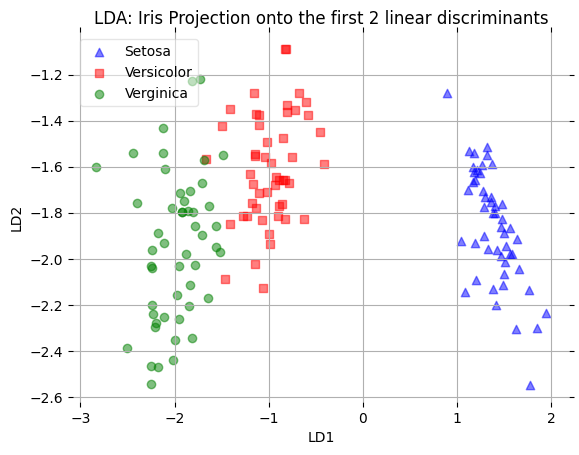

In [26]:
X_lda= X_iris.dot (W)

#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"

def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [y_iris== label],
            y= X_lda[:,1].real [y_iris ==label],
            marker = marker,
            color =color,
            alpha = 0.5,
            label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend (loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha (0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
                    labelbottom = "on", left = "off", right= "off", labelleft = "on")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible (False)
    ax.spines["bottom"].set_visible (False)
    ax.spines["left"].set_visible (False)
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

### Sử dụng thư viện sklearn

explained variance ratio (first two components): %s [0.9246 0.0531]


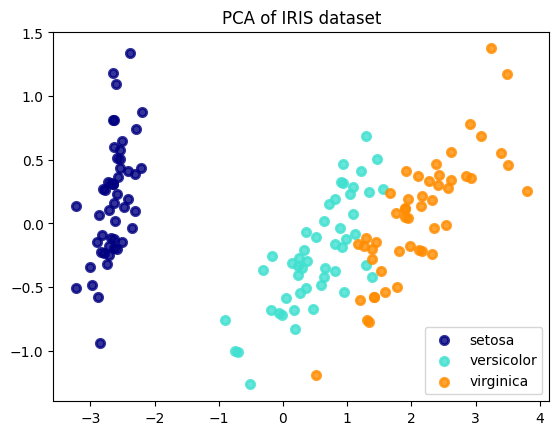

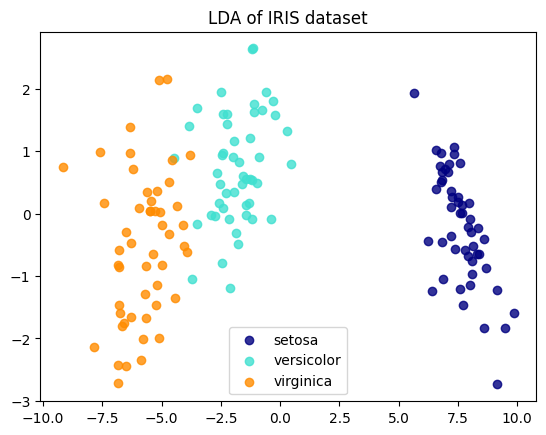

In [27]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
# Percentage of variance explained for each components
print("explained variance ratio (first two components): %s", str(pca.explained_variance_ratio_))

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
    X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
    X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

### Hàm chia Train:Test = 4:1 theo từng loại hoa

In [28]:
def train_test_iris(X, y):
    X_setosa = pd.DataFrame(X[y==0])
    X_versicolor = pd.DataFrame(X[y==1])
    X_virginica = pd.DataFrame(X[y==2])

    X_train = pd.concat([X_setosa[10:], X_versicolor[10:], X_virginica[10:]], axis=0)
    y_train = np.concatenate([y[10:50], y[60:100], y[110:150]], axis=0)

    X_test = pd.concat([X_setosa[:10], X_versicolor[:10], X_virginica[:10]], axis=0)
    y_test = np.concatenate([y[:10], y[50:60], y[100:110]], axis=0)
    
    return X_train, X_test, y_train, y_test

Sử dụng `LogisticRegression` để chạy với dữ liệu nguyên bản. In ra độ chính xác và ma trận nhầm lẫn.

In [29]:
logR = LogisticRegression(multi_class='multinomial', solver='sag')

X_train, X_test, y_train, y_test = train_test_iris(X, y)

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logR)
cm = confusion_matrix(y_test, y_pred_logR)

print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', cm)

Accuracy:
 1.0
Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Sử dụng `LogisticRegression` để chạy với dữ liệu đã `PCA`. In ra độ chính xác và ma trận nhầm lẫn.

In [30]:
X_train, X_test, y_train, y_test = train_test_iris(X_r, y)

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logR)
cm = confusion_matrix(y_test, y_pred_logR)

print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', cm)

Accuracy:
 0.9333333333333333
Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Sử dụng `LogisticRegression` để chạy với dữ liệu đã `LDA`. In ra độ chính xác và ma trận nhầm lẫn.

In [31]:
X_train, X_test, y_train, y_test = train_test_iris(X_r2, y)

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logR)
cm = confusion_matrix(y_test, y_pred_logR)

print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', cm)

Accuracy:
 1.0
Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Độ chính xác của mô hình khi sử dụng phương pháp `LDA` tốt hơn phương pháp `PCA`. 
* LDA : Accuracy: 1.0
* PCA : Accuracy: 0.9333333333333

Với dữ liệu nguyên bản thì `LDA` có cùng độ chính xác còn `PCA` thì thấp hơn.
* Nguyên bản : Accuracy: 1.0
* PCA : Accuracy: 0.9333333333333